# jointplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.jointplot()` позволяет строить графики, показывающие взаимосвязь между двумя переменными, а также их отдельные распределения.

Параметры функции:
- `data`: DataFrame, содержащий данные;
- `x`, `y`: названия столбцов или массивы данных для осей X и Y, соответственно;
- `hue`: указывает на категориальную переменную, которая будет использоваться для цветового кодирования точек на графике;
- `kind`: тип графика для визуализации совместного распределения. Возможные значения:
    - `'scatter'`: Точечный график (по умолчанию).
    - `'hist'`: Гистограмма.
    - `'reg'`: График регрессии с линией регрессии и доверительными интервалами.
    - `'resid'`: График остатков.
    - `'kde'`: График ядерной оценки плотности.
    - `'hex'`: Hexbin график.
- `height`: высота графика в дюймах (по умолчанию height=6);
- `ratio`: отношение высоты боковых графиков к высоте основного графика (по умолчанию ratio=5);
- `space`: расстояние между боковыми графиками и основным графиком (по умолчанию space=0.2);
- `dropna`: если True, пропущенные значения будут исключены из данных;
- `xlim`: кортеж, определяющий пределы оси X;
- `ylim`: кортеж, определяющий пределы оси Y;
- `color`: цвет графиков;
- `palette`: палитра цветов для различных значений переменной hue;
- `hue_order`: определяет порядок категорий, отображаемых на графике;
- `hue_norm`: нормализует цветовую шкалу;
- `marginal_ticks`: управляет отображением меток на боковых графиках (по умолчанию marginal_ticks=False);
- `joint_kws`: словарь с ключевыми словами для настройки основного графика;
- `marginal_kws`: словарь с ключевыми словами для настройки боковых графиков.

Загрузим обучающий датасет:

In [3]:
penguins = sns.load_dataset('penguins').dropna()

penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Датасет `penguins` содержит следующие столбцы:
- `'species'` - вид пингвина (Adelie, Chinstrap, Gentoo);
- `'island'` - остров, где были собраны данные (Biscoe, Dream, Torgersen);
- `'bill_length_mm'` - длина клюва в миллиметрах;
- `'bill_depth_mm'` - глубина клюва в миллиметрах;
- `'flipper_length_mm'` - длина ласт в миллиметрах;
- `'body_mass_g'` - масса тела в граммах;
- `'sex'` - пол пингвина (Male, Female).

Построим график jointplot, где по оси абсцисс отложим длину клюва пингвинов, а по оси ординат - глубину клюва:

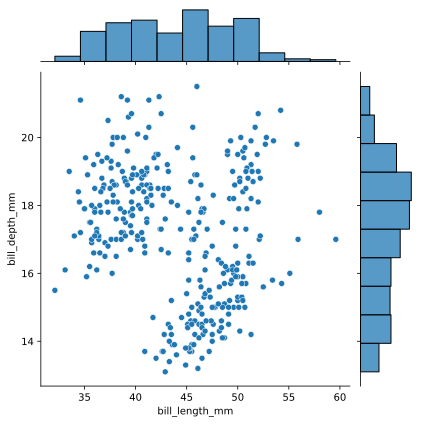

In [5]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm');

На основном графике по умолчанию отобразилась диаграмма рассеяния двух переменных, на верхнем графике нарисовалась гистограмма значений, расположенных по оси `X`, а на боковом графике - гистограмма значений, расположенных по оси `Y`.

**Параметр kind**

Параметр `kind` позволяет выбирать тип диаграммы, который отображается на основном графике. Помимо диаграммы рассеяния можно построить следующие виды графиков: `'hist'`, `'reg'`, `'resid'`, `'kde'`, `'hex'`. Построим эти графики и рассмотрим, как они будут выглядеть с параметрами по умолчанию.

`kind='hist'`:

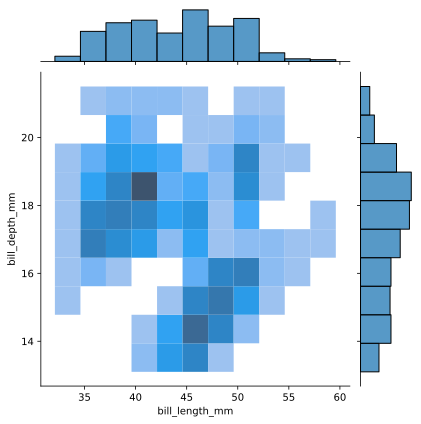

In [6]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='hist');

`kind='reg'`:

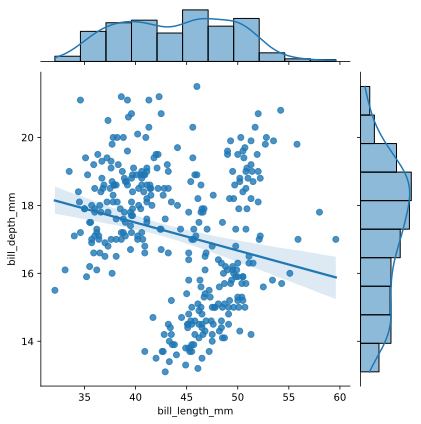

In [7]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='reg');

`kind='resid'`:

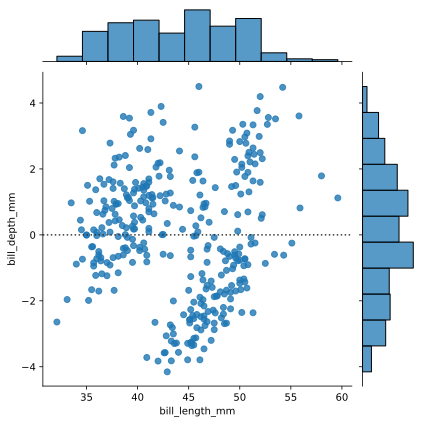

In [8]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='resid');

График остатков residplot показывает, насколько модель регрессии ошибается в предсказаниях. На оси X располагаются входные данные (то, что мы подаём в модель), а на оси Y - остатки, то есть разница между реальными значениями и предсказанными моделью.

Когда вы используете residplot, seaborn автоматически строит простую линейную регрессионную модель для данных. По сути, он пытается найти линию, которая лучше всего подходит вашим данным, и затем показывает, насколько каждое значение отклоняется от этой линии.

`kind='kde'`:

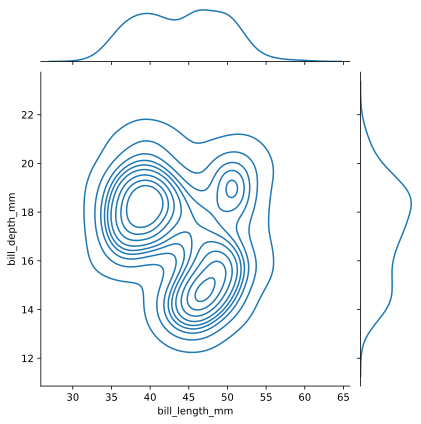

In [10]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='kde');

`kind='hex'`:

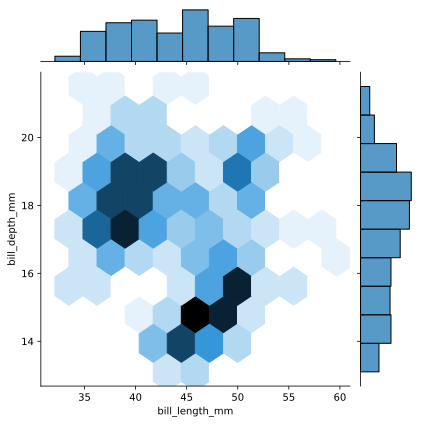

In [11]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='hex');

Все виды графиков, которые рисует функция `sns.jointplot()` мы ранее рассматривали в данном курсе, и они знакомы вам, кроме одного - hexbin графика. Это вид графика строит двумерную гистограмму, используя гексагональные ячейки (шестиугольники) для отображения плотности точек данных. Он полезен для визуализации взаимосвязи между двумя переменными, особенно при наличии большого количества данных, где традиционный точечный график может становиться перегруженным.

Функция `sns.jointplot()`, как и многие другие функции библиотеки seaborn, поддерживает работу с параметром `hue`. Применим его:

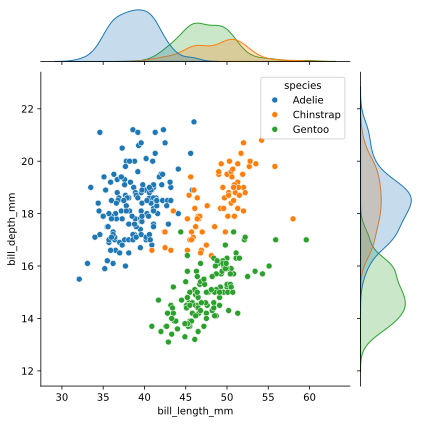

In [12]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              hue='species');

С графиком kde:

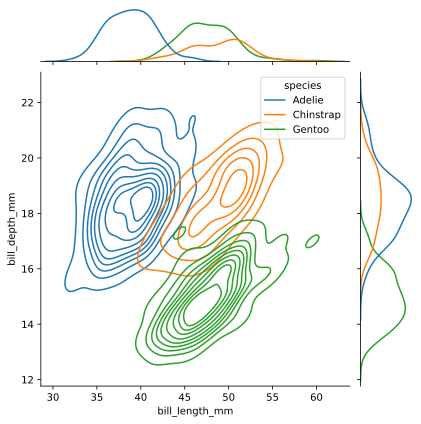

In [13]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='kde',
              hue='species');

Также поддерживается изменение цветовых палитр:

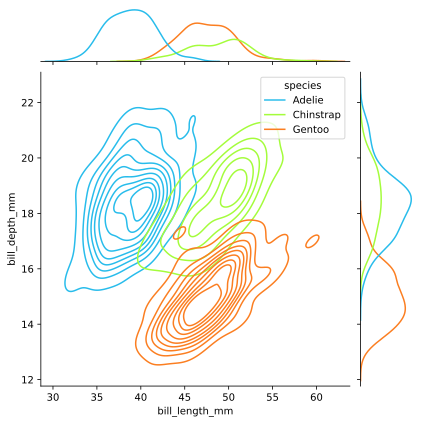

In [14]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='kde',
              hue='species',
              palette='turbo');

Цвет всех графиков меняется параметром `color`, например:

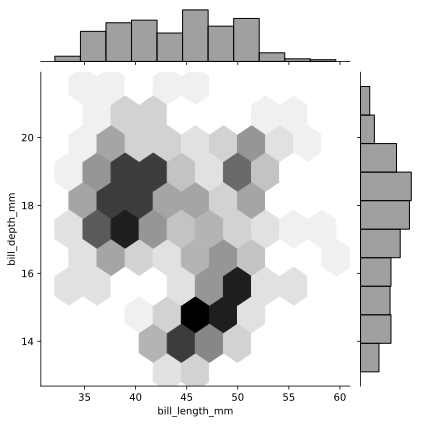

In [15]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='hex',
              color='grey');

Для графика, построенного с применением `kind='hex'`, имеются дополнительные параметры `cmap` и `gridsize`. Параметр cmap меняет цветовую палитку основного графика:

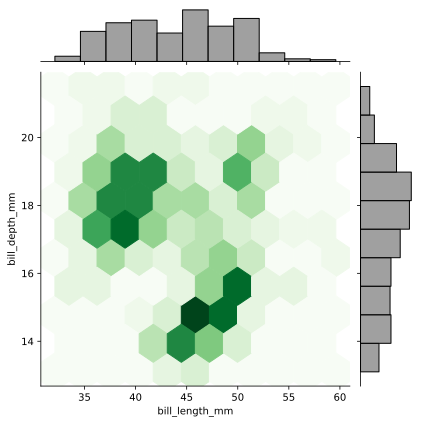

In [16]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='hex',
              color='grey',
              cmap='Greens');

А параметр `gridsize` позволяет изменять размеры ячеек - чем больше значение, тем меньше размер ячеек. Например, `gridsize=15`:

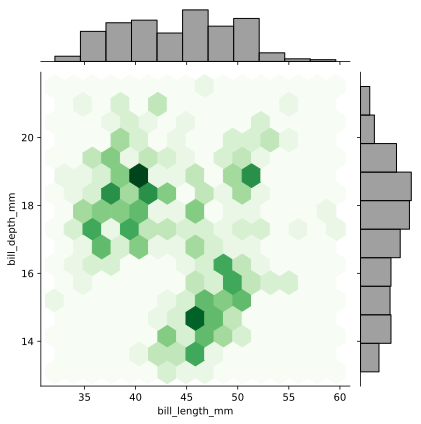

In [17]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='hex',
              color='grey',
              cmap='Greens',
              gridsize=15);

`gridsize=25`:

In [18]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='hex',
              color='grey',
              cmap='Greens',
              gridsize=25);

**Параметр height**

Параметр `height` управляет высотой графика. По умолчанию он принимает значение, равное 6 дюймам. Для примера уменьшим размер графика:

In [19]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              height=4);

**Параметр space**

Данный параметр управляет величиной расстояния между осями основного графика и осями дополнительных боковых графиков. По умолчанию `space=0.2`.

Для примера, вообще уберём зазоры между осями:

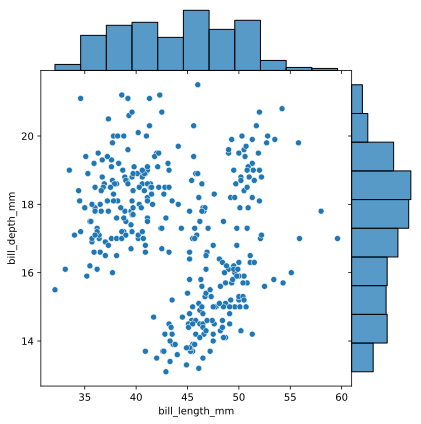

In [20]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              space=0);

**Параметр ratio**

Параметр `ratio` в функции `sns.jointplot()` отвечает за отношение высот боковых графиков к высоте основного графика. По умолчанию принимает значение 5.

Например, сделаем высоту дополнительных графиков побольше:

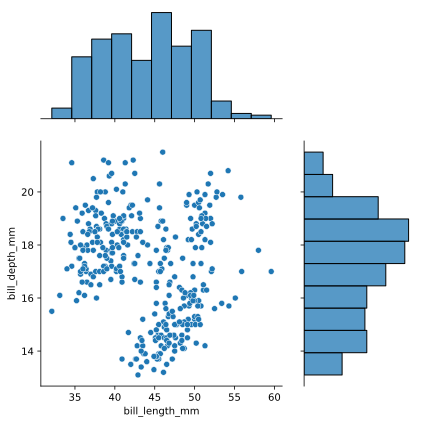

In [21]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              ratio=2);

**Параметры xlim и ylim**

Эти параметры функции `sns.jointplot()` позволяют задавать диапазоны значений для осей координат. Параметры принимают кортеж с начальным и конечным значениями, которые будут отображены на осях координат. Эти параметры можно использовать в тех случаях, когда необходимо более тщательно изучить определённую область данных. Например:

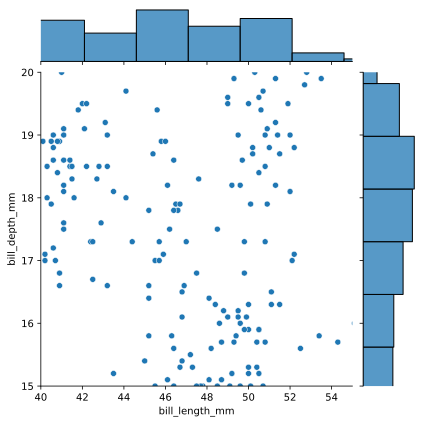

In [22]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              xlim=(40, 55),
              ylim=(15, 20));

**Параметр joint_kws**

Параметр `joint_kws` принимает словарь с ключевыми словами для настройки основного графика.

Пример удаления доверительного интервала с регрессионного графика:

In [23]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='reg',
              joint_kws={'ci': None});

Параметр order в словаре `joint_kws` функции `sns.jointplot()` используется для настройки полиномиального порядка регрессии, если вы строите график регрессии с помощью `kind='reg'`. Этот параметр позволяет указать степень полинома. Например:



In [24]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='reg',
              joint_kws={'ci': None,
                         'order': 2});

Параметр `marker` управляет типом точек на основном графике:

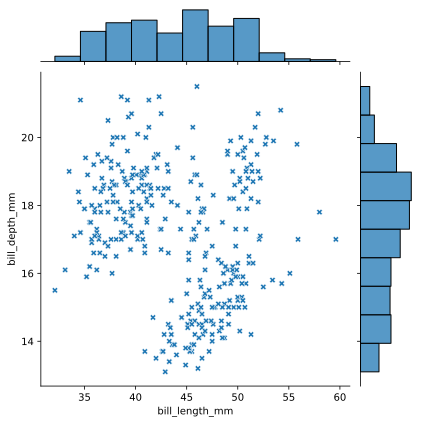

In [25]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              joint_kws={'marker': 'X'});

Цвет точек основного графика изменяется при помощи параметра `color` словаря `joint_kws`:

In [26]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              joint_kws={'marker': 'X',
                         'color': 'grey'});

**Параметр marginal_kws**

Параметр `marginal_kws` принимает словарь с ключевыми словами для настройки дополнительных графиков.

Изменение цвета дополнительных графиков:

In [27]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              joint_kws={'marker': 'X',
                         'color': 'grey'},
              marginal_kws={'color': 'RosyBrown'});

Выбор ширины линии графиков kde:

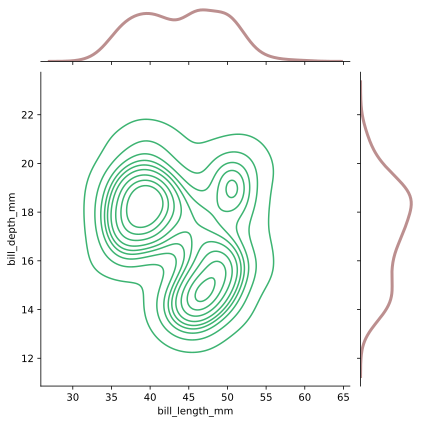

In [28]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='kde',
              joint_kws={'color': 'MediumSeaGreen'},
              marginal_kws={'color': 'RosyBrown',
                            'linewidth': 3});

Применение заливки параметром `'fill': True`:

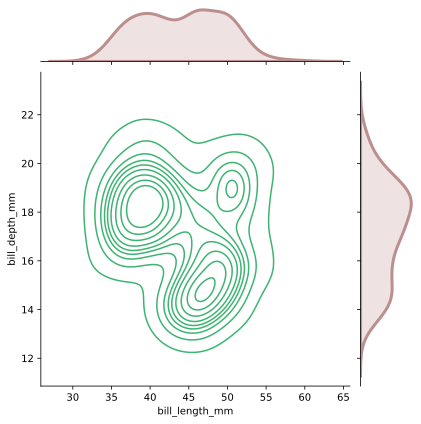

In [29]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='kde',
              joint_kws={'color': 'MediumSeaGreen'},
              marginal_kws={'color': 'RosyBrown',
                            'linewidth': 3,
                            'fill': True});

**Параметр marginal_ticks**

Параметр `marginal_ticks=True` добавляет оси на дополнительные графики. Например:

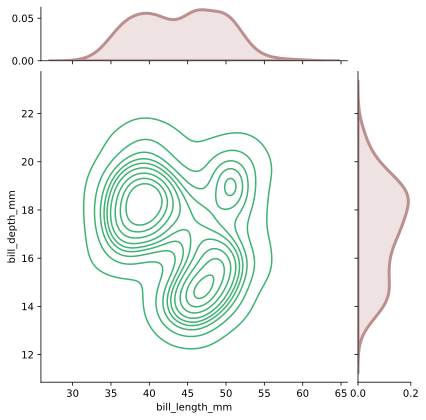

In [30]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
              kind='kde',
              joint_kws={'color': 'MediumSeaGreen'},
              marginal_kws={'color': 'RosyBrown',
                            'linewidth': 3,
                            'fill': True},
              marginal_ticks=True);

**JointGrid** - это класс из библиотеки seaborn, который позволяет создавать комбинированные графики, отображающие как совместное распределение двух переменных, так и их отдельные распределения.

Функция `sns.jointplot()` представляет собой высокоуровневую оболочку для класса **JointGrid**, упрощая создание комбинированных графиков. Фактически, `sns.jointplot()` создает экземпляр **JointGrid** и использует его методы для построения графиков.
 

Параметры класса **JointGrid**:
- `data`: DataFrame, массив;
- `x`, `y`: переменные для осей X и Y, соответственно;
- `hue`: переменная для разделения данных по цветам;
- `height`: высота графика в дюймах (по умолчанию height=6);
- `ratio`: отношение высоты боковых графиков к высоте основного графика (по умолчанию ratio=5);
- `space`: расстояние между боковыми графиками и основным графиком (по умолчанию space=0.2);
- `palette`:  палитра цветов для различных значений переменной hue;
- `hue_order`: определяет порядок категорий, отображаемых на графике;
- `hue_norm`: нормализует цветовую шкалу;
- `dropna`: если True, пропущенные значения будут исключены из данных (по умолчанию dropna=False);
- `xlim`: кортеж, определяющий пределы оси X;
- `ylim`: кортеж, определяющий пределы оси Y;
- `marginal_ticks`: словарь с ключевыми словами для настройки боковых графиков.

Основыные методы **JointGrid**:
- `plot`: Метод для построения графиков. Обычно передаются функции для основного и дополнительных графиков.
- `plot_joint`: Построение основного графика.
- `plot_marginals`: Построение дополнительных графиков.
- `set_axis_labels`: Установка меток осей.
- `refline`: Добавление линии на график.
- `savefig`: Сохранение графика.
- `ax_joint`: Основная ось для общего графика.
- `ax_marg_x`: Ось для дополнительного графика по оси X.
- `ax_marg_y`: Ось для дополнительного графика по оси Y.

Создадим "пустой" объект класса **JointGrid**:

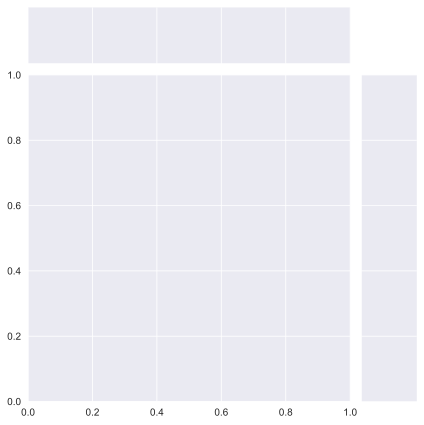

In [31]:
sns.set_style('darkgrid')

sns.JointGrid();

А теперь наполним **JointGrid** информацией и посмотрим на полученный результат:

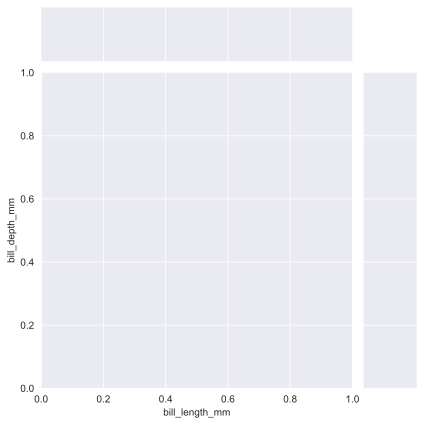

In [32]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm');

Результат оказался не вполне ожидаемым, так как на графиках не отобразилось никакой визуализации, а только лишь появились наименования осей. Для наполнения областей графика различными визуализациями следует воспользоваться методами класса **JointGrid**.

**Метод plot()**

Метод `plot()` используется для создания графиков. В качестве первого аргумента указывается функция, отвечающая за построение основного графика, а в качестве второго - функция, которая будет использоваться для построения дополнительных подграфиков.

Например, на основном графике построим диаграмму рассеяния, а на дополнительных подграфиках - гистограммы:

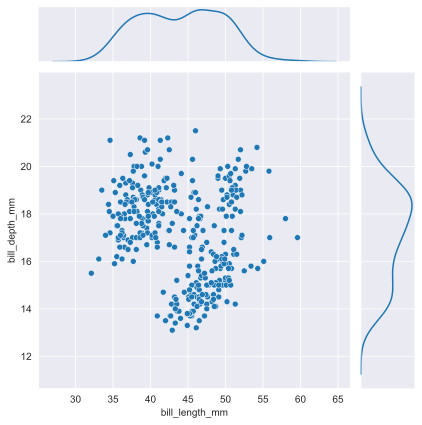

In [33]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot(sns.scatterplot, sns.kdeplot);

На графиках можно разделить цветом значения по категориям, используя параметр `hue` класса **JointGrid**. Например:

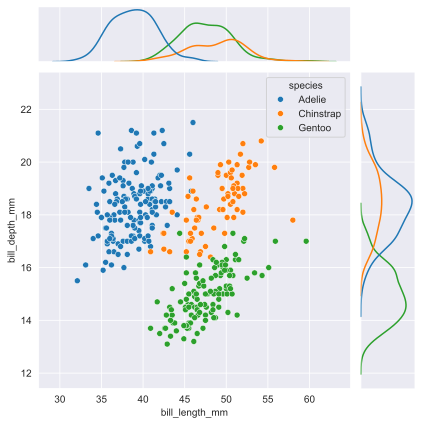

In [34]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                  hue='species')
g.plot(sns.scatterplot, sns.kdeplot);

**Методы plot_joint(), plot_marginals()**

Метод `plot_joint()` используется для добавления диаграммы на основную ось.

Пример использования:

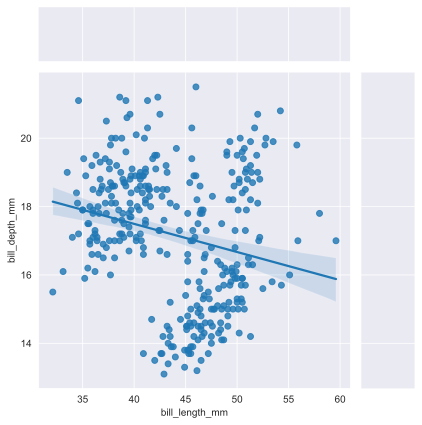

In [35]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot_joint(sns.regplot);

А метод `plot_marginals()` используется для добавления диаграмм на дополнительные оси. Например, отобразим на дополнительных осях графики `kde`:

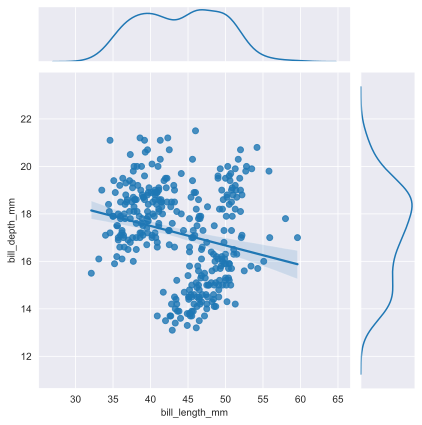

In [36]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot_joint(sns.regplot)
g.plot_marginals(sns.kdeplot);

В методах `plot_joint()` и `plot_marginals()` можно использовать дополнительные параметры для управления внешним видом графиков. Например, отобразим заливку на дополнительных графиках, используя параметр `fill=True`:

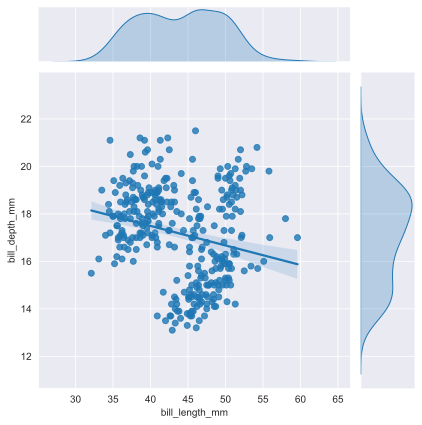

In [37]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot_joint(sns.regplot)
g.plot_marginals(sns.kdeplot, fill=True);

**Атрибуты ax_joint, ax_marg_x, ax_marg_y**

Атрибуты `ax_joint`, `ax_marg_x` и `ax_marg_y` в классе **JointGrid** позволяют настраивать и модифицировать различные части комбинированного графика. Они представляют собой оси *matplotlib*, которые используются для построения различных частей графика:
- `ax_joint`: Основная ось, на которой отображается основной график.
- `ax_marg_x`: Ось, на которой отображается дополнительный график по оси `X`.
- `ax_marg_y`: Ось, на которой отображается дополнительный график по оси `Y`.

Чтобы понять логику работы этих атрибутов, посмотрите на следующий код и на результат его выполнения.

In [38]:
g = sns.JointGrid()
x = 'bill_length_mm'
y = 'bill_depth_mm'

sns.regplot(data=penguins, x=x, y=y,
            ax=g.ax_joint);

Таким образом, мы создаём объект **JointGrid**, затем реализуем функцию для построения графика, которую посредством параметра ax передаём на соответствующую ось этого объекта.

Использование атрибутов `ax_marg_x`, `ax_marg_y` позволяет создавать разные, а не одинаковые графики на дополнительных осях. Например, на верхнем дополнительном графике нарисуем диаграмму `kde`, а на правом дополнительном графике отобразим гистограмму:

In [39]:
g = sns.JointGrid()
x = 'bill_length_mm'
y = 'bill_depth_mm'

sns.regplot(data=penguins, x=x, y=y,
            ax=g.ax_joint)
sns.kdeplot(data=penguins, x=x,
            ax=g.ax_marg_x)
sns.histplot(data=penguins, y=y,
            ax=g.ax_marg_y);

В итоге получился график с разными типами диаграмм на дополнительных осях. Далее, мы каждый график можем настраивать по отдельности. Например, добавим на гистограмму линию kde:

In [40]:
g = sns.JointGrid()
x = 'bill_length_mm'
y = 'bill_depth_mm'

sns.regplot(data=penguins, x=x, y=y,
            ax=g.ax_joint)
sns.kdeplot(data=penguins, x=x,
            ax=g.ax_marg_x)
sns.histplot(data=penguins, y=y,
            ax=g.ax_marg_y,
            kde=True);

Или, например, применим параметр `hue` только к боковой гистограмме:

In [41]:
g = sns.JointGrid()
x = 'bill_length_mm'
y = 'bill_depth_mm'

sns.regplot(data=penguins, x=x, y=y,
            ax=g.ax_joint)
sns.kdeplot(data=penguins, x=x,
            ax=g.ax_marg_x)
sns.histplot(data=penguins, y=y,
            ax=g.ax_marg_y,
            hue='species');

Поменяем вариант отобразения гистограммы на `'stack'`:

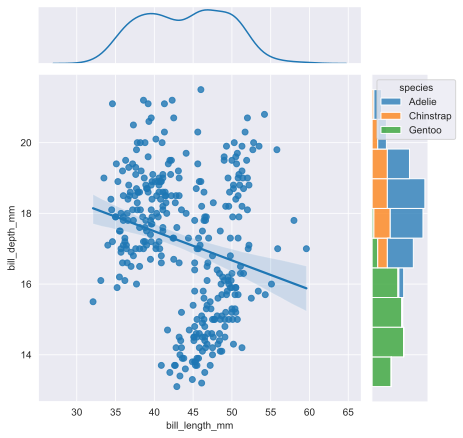

In [42]:
g = sns.JointGrid()
x = 'bill_length_mm'
y = 'bill_depth_mm'

sns.regplot(data=penguins, x=x, y=y,
            ax=g.ax_joint)
sns.kdeplot(data=penguins, x=x,
            ax=g.ax_marg_x)
sns.histplot(data=penguins, y=y,
            ax=g.ax_marg_y,
            hue='species',
            multiple='stack');

**Метод set_axis_labels**

Метод `set_axis_labels` позволяет изменять наименования осей.

Пример использования:

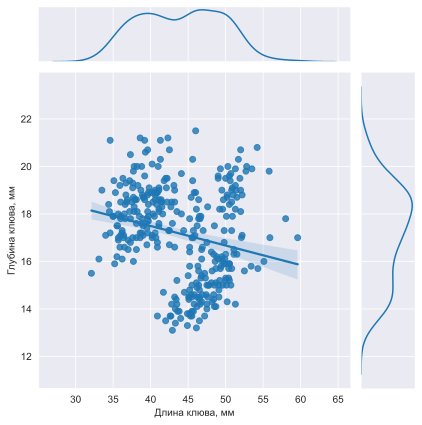

In [43]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot_joint(sns.regplot)
g.plot_marginals(sns.kdeplot)
g.set_axis_labels(xlabel='Длина клюва, мм', 
                  ylabel='Глубина клюва, мм');

Параметр `fontsize` метода `set_axis_labels` позволяет регулировать размер шрифта. Для примера увеличим размер шрифта:

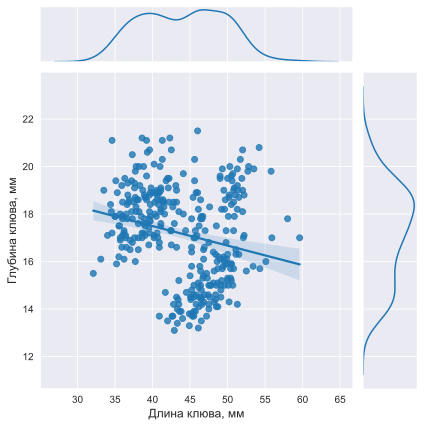

In [44]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot_joint(sns.regplot)
g.plot_marginals(sns.kdeplot)
g.set_axis_labels(xlabel='Длина клюва, мм', 
                  ylabel='Глубина клюва, мм',
                  fontsize=12);